In [1]:
import os
import shutil
import scipy
from scipy import stats
from skimage.io import imread, imsave
import numpy as np
from matplotlib import pyplot as plt
import cv2
import time
import pandas as pd
import pickle
import pywt
from skimage.feature import hog,hessian_matrix, hessian_matrix_eigvals
from scipy import ndimage as nd
from skimage.filters import roberts, sobel, scharr, prewitt
# from scipy.ndimage import filters

In [2]:
def extract_features(image_path):
    df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
    #Reset dataframe to blank after each loop.
    
    input_img = imread(image_path)  #Read images
    
    #Check if the input image is RGB or grey and convert to grey if RGB
    input_inverted_image = 1-(input_img[:,:,2]+input_img[:,:,0]-input_img[:,:,1])
    img = input_inverted_image 
    pixel_values = input_inverted_image.reshape(-1)
    df['Pixel_Value'] = pixel_values   #Pixel value itself as a feature


    #SOBEL
    edge_sobel = sobel(img)
    edge_sobel1 = edge_sobel.reshape(-1)
    df['Sobel'] = edge_sobel1
       
    #GAUSSIAN with sigma=2
    
    gaussian_img = nd.gaussian_filter(img, sigma=2)
    gaussian_img1 = gaussian_img.reshape(-1)
    df['Gaussian s2'] = gaussian_img1
     
    #MEDIAN with sigma=3
    median_img = nd.median_filter(img, size=3)
    median_img1 = median_img.reshape(-1)
    df['Median s3'] = median_img1
    
    #VARIANCE with size=3
    variance_img = nd.generic_filter(img, np.var, size=3)
    variance_img1 = variance_img.reshape(-1)
    df['Variance s3'] = variance_img1 #Add column to original dataframe
                              
    features, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True)
#     plt.imshow(hog_image)
    df['Hog Image'] = (hog_image/255.0).reshape(-1)
    feature_image = features.reshape((int(np.sqrt(len(features))),int(np.sqrt(len(features)))))
    feature_image_orig = cv2.resize(feature_image, img.shape)
    df['Hog Features'] = feature_image_orig.reshape(-1)
    
    hessian_matrix_ = hessian_matrix((img), sigma=1.0)
    eigenvalues = hessian_matrix_eigvals(hessian_matrix_)
    
    for i,hess_mat_img in enumerate(hessian_matrix_):
        df['Hessian matrix '+ str(i)] = hess_mat_img.reshape(-1)
        
    for i,hess_ev_img in enumerate(eigenvalues):
        df['Hessian EV '+ str(i)] = hess_ev_img.reshape(-1)
    
    normalized_df = df.apply(lambda x: x / np.linalg.norm(x))
    return normalized_df


In [3]:
image_dataset = pd.DataFrame()  #Dataframe to capture image features
img_path = "/data/Devel_Human/Images/"

for imagefile in os.listdir(img_path):  #iterate through each file 
    print(imagefile)
    img_df = extract_features(img_path + imagefile)
    image_dataset = image_dataset.append(img_df)
#     break

14731.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15340.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


14882.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15185.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


14883.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15187.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15036.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15189.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


14729.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


14730.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15212.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15035.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


14885.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


14733.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


14884.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15037.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


14881.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15033.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15186.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15213.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15338.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


14732.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15034.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15215.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


14880.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15214.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15337.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15184.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15188.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15336.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15032.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15339.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


14728.jpg


/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)
/tmp/ipykernel_4317/1631789970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


In [10]:
#Import training classifier
from sklearn.mixture import GaussianMixture
# Instantiate the GMM model
model = GaussianMixture(n_components=3, covariance_type='full',max_iter=500, random_state=42)

model.fit(image_dataset)

# Save the trained model as a pickle file
model_name = "gmm_model.pkl"
with open(model_name, 'wb') as file:
    pickle.dump(model, file)

#loaded_model = pickle.load(open(model_name, 'rb'))

In [11]:
filename = "gmm_model.pkl"
loaded_model = pickle.load(open(filename, 'rb'))

/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)


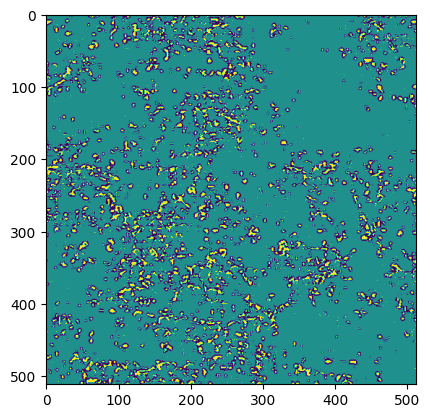

In [12]:
X = extract_features('/data/Devel_Human/Images/14730.jpg')
result = loaded_model.predict(X)
segmented = result.reshape((512,512))
plt.imshow(segmented*255)

In [ ]:
# plt.imshow(hog_image)

In [36]:
import matplotlib.pyplot as plt

def show_images_side_by_side(img_id,image1, image2):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    axes[0].imshow(image1)
    axes[0].axis('off')
    
    axes[1].imshow(image2)
    axes[1].axis('off')

    plt.tight_layout()
    plt.title(img_id)
    plt.show()


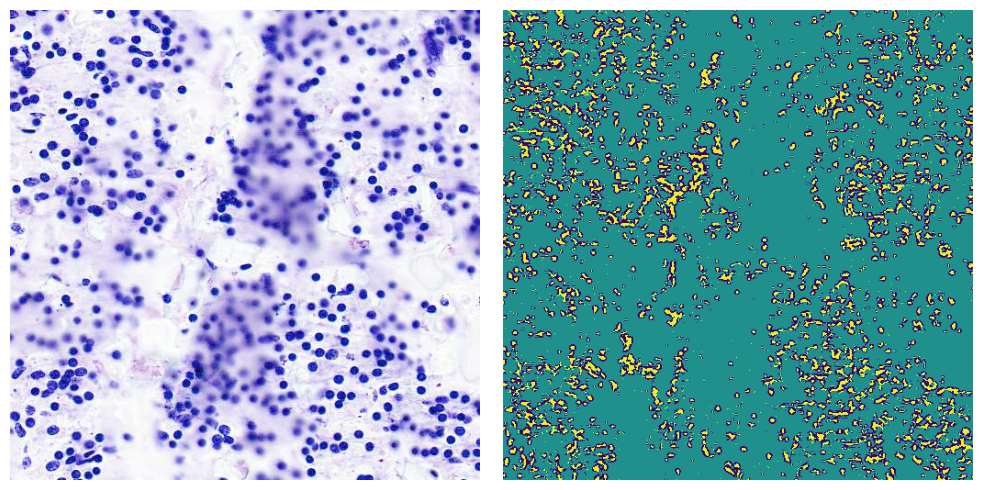

In [24]:
show_images_side_by_side(imread('18225.jpg'),segmented)

/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)


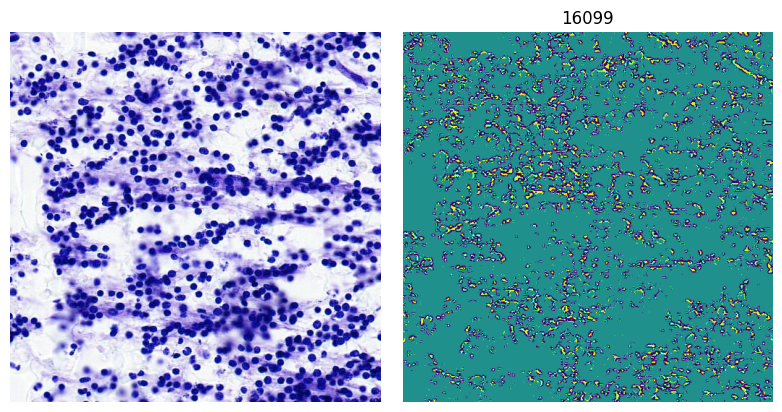

/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)


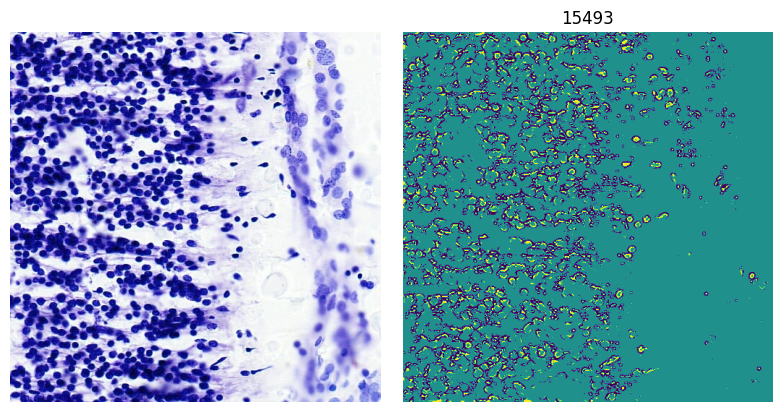

/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)


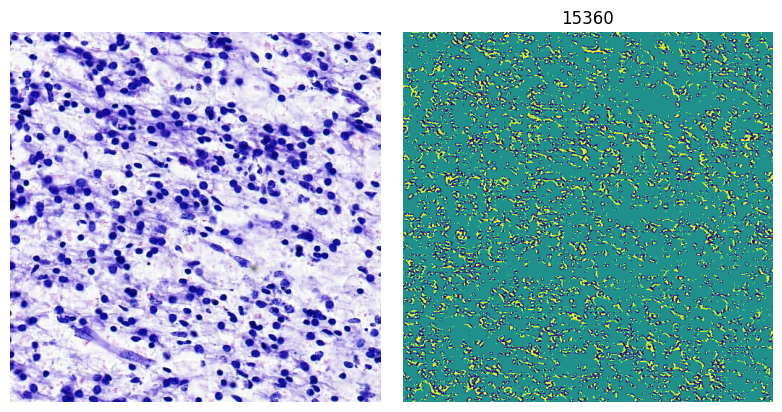

/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)


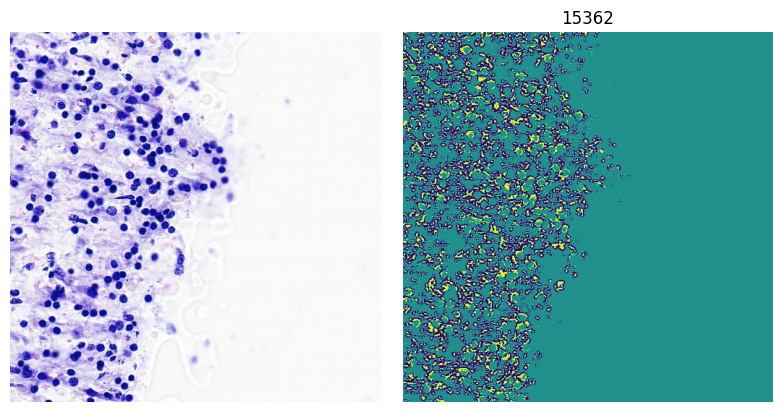

/tmp/ipykernel_4317/1815243651.py:43: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrix_ = hessian_matrix((img), sigma=1.0)


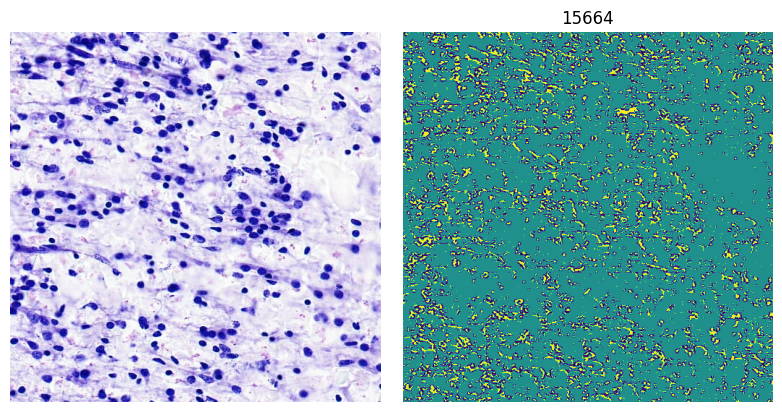

In [37]:
import glob
for img_path in glob.glob('/data/samplefb10/*.jpg'):
    img_id = img_path.split('/')[-1][:-4]
    X = extract_features(img_path)
    result = loaded_model.predict(X)
    segmented = result.reshape((512,512))
    show_images_side_by_side(img_id,imread(img_path), segmented)

In [39]:
# plt.imshow(segmented==0)

In [38]:
# a=['16099.jpg','15362.jpg','15493.jpg','15664.jpg','15360.jpg']
# for i in a:
#     if i in os.listdir('/data/Devel_Human/Images'):
#         print(i)